# xAI - Disclaimer
- Here only Data-Analysis For now
- xAI would include training models like ARIMA and interpreting there Components to better understand how they work, Calculating SHAP Values to find out which features are important, etc.
- However, we consider Time Series Decomposition the most interesting Starting Point even though it is "only" a Data Analysis approach

In [1]:
!pip install -q statsmodels


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Download the Dataset, it only works on Linux Systems like Colab 
# TODO: For BTW25 your own Dataset will be required
!wget https://ember-climate.org/app/uploads/2023/12/european_wholesale_electricity_price_data_hourly.zip # For Win: Download dataset with link, unzip, and put into flderdefined below

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
from matplotlib import pyplot

In [2]:
# Load Data Set
df = pd.read_csv("../data/european_wholesale_electricity_price_data_hourly/european_wholesale_electricity_price_data_hourly/Germany.csv")
df = df.sort_values(by="Datetime (UTC)")
df.index = pd.to_datetime(df["Datetime (UTC)"])
series = df["Price (EUR/MWhe)"]

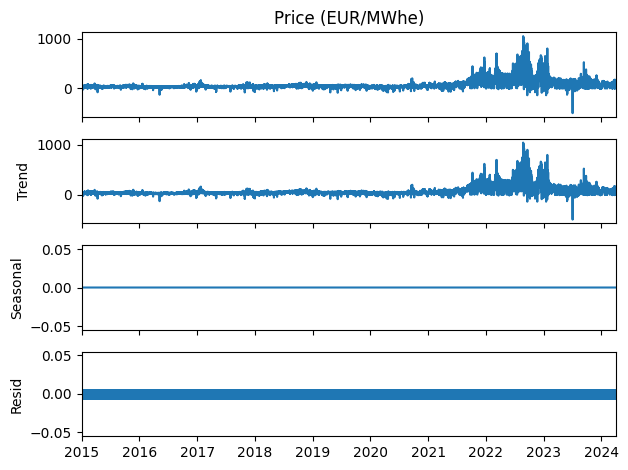

In [3]:
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
pyplot.show()

## As we see, do we see nothing
- Let's decrease Time-Frame, such that it does not need to fit changes over ages into a single model

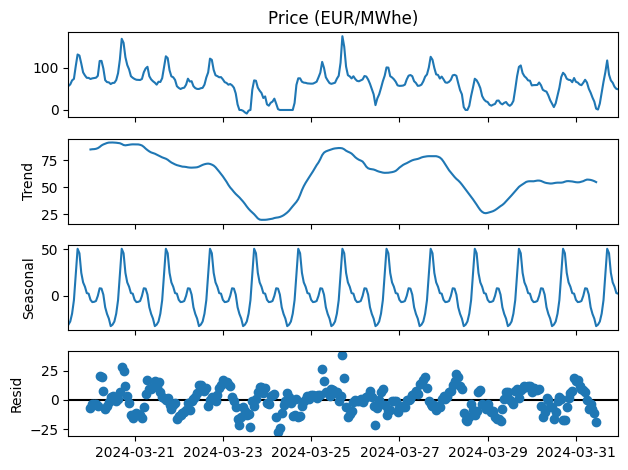

In [4]:
result = seasonal_decompose(series[-300:], model='additive')
result.plot()
pyplot.show()

## With decreased Time-Frame 
- On the Trend, we see that on Weekends the MWhe is much cheaper 
- Daily Seasons were identified
- We also see a dip at the 29.03 there was Good Friday this year 
## Conclusion
- Forecasters might profit from including weekdays and Holidays as external influences
## Further Work Ideas
- Deeper Analysis (More Analysis Methods)
- Examine different Time Spans e.g. a month, a week, a day, ...
- Identifying further External Influences
- Explore useful Preprocessing Steps
- Exploring Time Series Forecasting Methods (AutoArima, ETS, Prophet, ...) + real xAI
- Combining those with Neural Networks (NNs) (
    - Similar Approach used by AutoGluon
    - Idea: 
        - Predict the residual part with NNs that is (by definition) too hard to predict by Traditional Methods
        - Predict base repeating patterns with Traditional Methods because they are really good at this 
        - While NNs struggle with stuff like Regression to the Mean (If they do longer forecasts they just predict the mean of the Series
        - In Short: NNs are good at making fine adjustments to the Forecast of the Traditional Methods